In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

In [2]:
import pandas as pd
import numpy as np

In [540]:
from recommender_system.algorithm.nn_recommender import NearestNeighborsRecommender
from recommender_system.algorithm.track_pool_processor import TrackPoolProcessor

recommender = NearestNeighborsRecommender()

Fitting normalizer: 100%|██████████| 12/12 [00:01<00:00,  7.04it/s]


In [566]:
playlist_ids = [
    "601Iusie3AK8PBbRBm8Bey",
    "6XrF8id5mKXlBYkJ4v3qCG",
    "6k1KOlbVwtv4Mk95tzafJK"
]

In [529]:
playlist_ids = [
    "7LS5v4yLCycXwsrwNw6Klk",
    "37i9dQZF1DX4WYpdgoIcn6",
    "0OHx2BNf1Heu8EcGoQqRBD",
    "37i9dQZF1DWWMOmoXKqHTD"
]

In [551]:
playlist_ids = [
    "3N20dlGaDinECdsiluhIfv",
    "37i9dQZF1EQoqCH7BwIYb7"
]

In [567]:
tracks = []

for playlist in playlist_ids:
    tracks += recommender._data_provider.get_playlist_tracks(playlist_id=playlist)

In [568]:
representation_vectors = [recommender._data_provider.get_track_representation_vector(track) for track in tracks]

In [569]:
from recommender_system.algorithm.profile_creator import ProfileCreator

profile_creator = ProfileCreator()

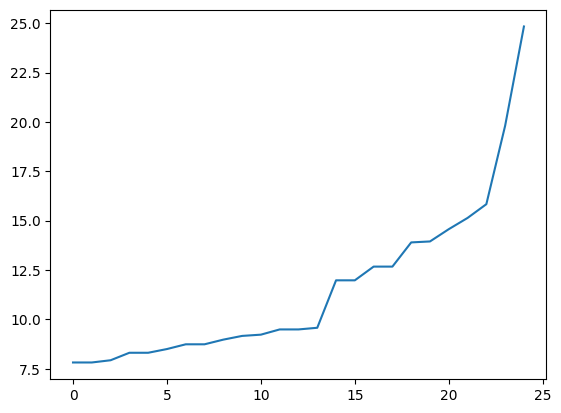

In [570]:
# choosing eps
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

tsne_reduced_output = profile_creator._dimensionality_reducer.fit_transform(
            np.array([v for v in representation_vectors if v is not None])
        )

nbrs = NearestNeighbors(n_neighbors=4).fit(tsne_reduced_output)
distances, indices = nbrs.kneighbors(tsne_reduced_output)
distances = distances[:,2]
distances = np.sort(distances, axis=0)
plt.plot(distances)

In [571]:
np.percentile(distances, 95) + 0.2 * np.percentile(distances, 95)

22.814665967879332

In [572]:
points = profile_creator.get_tsne_points_with_cluster(tracks=representation_vectors)

In [573]:
df_points = [
    [
        track.name, 
        track.name_artists[0], 
        ",".join(track.genres), 
        track.track_age,
        track.popularity,
        p[0][0], 
        p[0][1], 
        p[1]
    ] for track, p in zip(tracks, points)
]

In [574]:
df = pd.DataFrame(df_points, columns=['track_name', 'artist_name', 'genres' , 'age', 'popularity', 'x', 'y', 'cluster'])
df['cluster'] = df['cluster'].astype(str)
df['cluster'] = df['cluster'].apply(lambda x: "Noise" if x == '-1' else x)
df.head()

,track_name,artist_name,genres,age,popularity,x,y,cluster
0,Sweet Disposition - Bootleg,The Temper Trap,"alternative dance,australian indie,indie pop,i...",6.0,52.0,52.229412,-1.264745,0
1,Unsteady,X Ambassadors,"modern alternative rock,modern rock,pop,pop ro...",7.0,75.0,28.170343,13.976840,0
2,STAY (with Justin Bieber),The Kid LAROI,"australian hip hop,canadian pop,pop,post-teen pop",1.0,88.0,39.170811,7.686497,0
3,Where You Are,John Summit,"deep groove house,deep house,edm,house,pop dance",0.0,80.0,-27.794811,-7.859976,1
4,I Like Me Better,Lauv,"electropop,pop,post-teen pop",5.0,84.0,26.997061,38.829094,0


In [575]:
import plotly.express as px

In [576]:
fig = px.scatter(df, x="x", y="y",
                    color="cluster", hover_name="track_name",
                    hover_data=["artist_name", "age", "popularity", "genres"],
                    title="Input tracks categorized based on multiple characteristics",
                )
        
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    showlegend=True
)

fig.update_layout(transition_duration=200)

In [577]:
track_pool = TrackPoolProcessor.create_track_pool_from_list(
    track_list=tracks
)

In [578]:
recommendations = recommender.recommend_k_tracks_for_track_pool(
    track_pool=track_pool
)

In [579]:
print(len(recommendations))

30


In [580]:
[
    (
        recom.track.name,
        recom.track.name_artists[0]
    ) for recom in recommendations

]

[("What's My Name?", 'Rihanna'),
 ('Somebody Else', 'The 1975'),
 ('Diamonds', 'Sam Smith'),
 ('On Your Mind', 'Kaskade'),
 ('Now Or Never', 'Halsey'),
 ('Sixteen', 'Ellie Goulding'),
 ('Dark Days', 'Local Natives'),
 ('Flow', 'Crooked Colours'),
 ('Shipwreck', 'Klangkarussell'),
 ('The Trip', 'Still Corners'),
 ('Counting Stars', 'OneRepublic'),
 ('Symphony (feat. Zara Larsson)', 'Clean Bandit'),
 ('BOOM', 'Tiësto'),
 ('Close', 'Nick Jonas'),
 ('Children', 'Tinlicker'),
 ('The Jam', 'Kideko'),
 ('PILLOWTALK', 'ZAYN'),
 ('Crab Rave', 'Noisestorm'),
 ('Only Girl (In The World)', 'Rihanna'),
 ('Drop It', 'Tujamo'),
 ('Insomnia - Monster Mix', 'Faithless'),
 ('Look What You Made Me Do', 'Taylor Swift'),
 ('We Found Love', 'Rihanna'),
 ('UFO - Radio Edit', 'Vigiland'),
 ('Tsunami', 'DVBBS'),
 ('Tremor - Sensation 2014 Anthem; Radio Edit', 'Dimitri Vegas & Like Mike'),
 ('The Logical Song', 'MATTN'),
 ('You Belong With Me', 'Taylor Swift'),
 ('Hold Back The River', 'James Bay'),
 ('La Di Da